# FieldTwin API Python Examples

This python notebook runs an example demo of using the FieldTwin API.  
See the API documentation (https://api.fieldtwin.com/).   
   
    
The demo requires an API access token to be entered. Press the run icon in 
the cell below to enter the API access token.

In [4]:
import getpass

apiToken = ''
# User input to enter API token
apiToken = getpass.getpass()

# HTTPS GET examples

The following code runs a GET request to read an example project.

In [5]:
import requests
import json

apiUrl = 'https://backend.qa.fieldtwin.com/API/v1.9/'

# Field Exporter Integration Testing project
projectId = '-M-HHqMifhz6qskW2goc'
subprojectId = '-M-HI0DPuadaK9GLCWzR'

if apiToken:
  response = requests.get(
    f'{apiUrl}{projectId}', 
    headers={'token': apiToken}
  )
  project = response.json()
  print(project['name'])
else:
  print('API access token must be entered')

Field Exporter Integration Testing


The following code loads subproject connection data into a Pandas data frame

In [6]:
import pandas as pd

apiUrl = 'https://backend.qa.fieldtwin.com/API/v1.9/'

# Field Exporter Integration Testing project
projectId = '-M-HHqMifhz6qskW2goc'
subprojectId = '-M-HI0DPuadaK9GLCWzR'

# the pandas dataframe
df = {}

if apiToken:
  # retrieve the subproject data
  response = requests.get(
    f'{apiUrl}{projectId}/subProject/{subprojectId}', 
    headers={'token': apiToken}
  )
  subproject = response.json()
  connections = subproject['connections']

  items = []
  for connectionId in connections:
    connection = connections[connectionId]
    item = {
      'Name': connection['params']['label'], 
      'Length': connection['length']
    }
    items.append(item)

  # populate the dataframe
  df  = pd.DataFrame(items)
  
else:
  print('API access token must be entered')

Sort the data and display in a table

In [7]:
from IPython.display import display, HTML

df.sort_values(by=['Length'], inplace=True)
display(HTML(df.to_html()))

,Name,Length
20,Umbilical #1,1.989916
19,Umbilical #1,14.962072
25,Umbilical #14,31.278866
7,Hydraulic Lead #1,37.206881
24,Umbilical #13,38.792629
22,Oil Production #8,41.080231
8,Umbilical #3,47.252462
10,Umbilical #5,50.437293
9,Umbilical #4,60.811873
12,Hydraulic Lead #2,62.142316


Sort and plot the dataframe

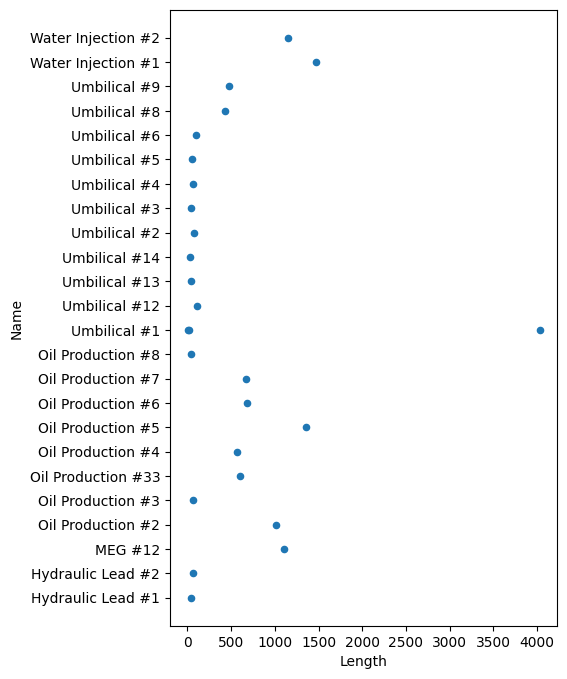

In [9]:
import matplotlib.pyplot as plotter

df.sort_values(by=['Name'], inplace=True)
df.plot(kind = 'scatter', x = 'Length', y = 'Name', figsize=(5, 8))
plotter.show()

# HTTPS PATCH Example

The following code performs an HTTPS PATCH operation to update a metadata value
for a staged asset.

In [12]:
apiUrl = 'https://backend.qa.fieldtwin.com/API/v1.9/'

# Field Exporter Integration Testing project
projectId = '-M-HHqMifhz6qskW2goc'
subprojectId = '-M-HI0DPuadaK9GLCWzR'

# XMT shallow water asset
asset = '-MkCvy0SPaTe65knzJmN'

# Design Life metadata update value
patchData ='{"metaData": [{"metaDatumId": "-N68U9EVu9djcN8gahs2", "value": 15}]}'

if apiToken:
  response = requests.patch(
    f'{apiUrl}{projectId}/subProject/{subprojectId}/stagedAsset/{asset}', 
    data=patchData,
    headers={'token': apiToken, "Content-Type": "application/json"}
  )
  print(response)

else:
  print('API access token must be entered')



<Response [200]>


Perform a GET to read back the updated metadata value

In [13]:
if apiToken:
  response = requests.get(
    f'{apiUrl}{projectId}/subProject/{subprojectId}/stagedAsset/{asset}', 
    headers={'token': apiToken, "Content-Type": "application/json"}
  )
  assetData = response.json()
  metaData = assetData['metaData']

  for item in metaData:
    if item['name'] == 'Design Life':
      print(f'{assetData["name"]}: {item["name"]}: {item["value"]} {item["unit"]["unitDefaultSymbol"]}')

else:
  print('API access token must be entered')

XMT shallow water #4: Design Life: 15 Years
